In [61]:
import os
import glob
import numpy as np
import cv2
import shutil
from tqdm import tqdm

In [71]:
alpha_dir_template = "/home/chuongh/vm2m/data/HIM2K/alphas/SPLIT"
mask_dir_template = "/home/chuongh/vm2m/data/HIM2K/masks_matched_SUBDIR/SPLIT"
out_dir_template = "/home/chuongh/vm2m/data/HIM2K/masks_matched_SUBDIR_new/SPLIT"
splits = ["natural", "comp"]
subdirs = [
    "r50_c4_3x", 
    "r50_dc5_3x",
    "r50_fpn_3x",
    "r50_fpn_400e",
    "r101_c4_3x",
    "r101_fpn_3x",
    "r101_fpn_400e",
    "regnetx_400e",
    "regnety_400e",
    "x101_fpn_3x"
]

In [72]:
def load_all_masks(all_paths):
    masks = []
    for path in all_paths:
        mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE) / 255.0
        masks.append(mask)
    return np.array(masks)

count_err = 0
for split in splits:
    for subdir in subdirs:
        alpha_dir = alpha_dir_template.replace("SPLIT", split).replace("SUBDIR", subdir)
        mask_dir = mask_dir_template.replace("SPLIT", split).replace("SUBDIR", subdir)
        out_dir = out_dir_template.replace("SPLIT", split).replace("SUBDIR", subdir)
        print("Processing", split, subdir)
        for image_name in tqdm(os.listdir(alpha_dir)):
            alpha_paths = glob.glob(os.path.join(alpha_dir, image_name) + "/*.png")
            mask_paths = glob.glob(os.path.join(mask_dir, image_name) + "/*.png")
            alpha_paths.sort()
            mask_paths.sort()
            assert len(alpha_paths) == len(mask_paths)
                # print("Error", os.path.join(mask_dir, image_name))
                # continue
            if os.path.exists(os.path.join(out_dir, image_name)):
                continue
            masks = load_all_masks(mask_paths)
            alphas = load_all_masks(alpha_paths)
            

            intersection = np.sum(masks, axis=0)> 1.0
            if intersection.sum() == 0:
                for i, mask_path in enumerate(mask_paths):
                    new_mask_path = mask_path.replace(mask_dir, out_dir)
                    os.makedirs(os.path.dirname(new_mask_path), exist_ok=True)
                    shutil.copyfile(mask_path, new_mask_path)
                continue
            count_err += 1
            # print("Processing", image_name)
            # create one-hot masks from alpha_ids
            alpha_ids = np.argmax(alphas, axis=0)
            onehot_alphas = np.zeros_like(alphas)
            xx, yy = np.meshgrid(np.arange(alphas.shape[2]), np.arange(alphas.shape[1]))
            onehot_alphas[alpha_ids.flatten(), yy.flatten(), xx.flatten()] = 1

            # intersection between masks
            new_masks = (onehot_alphas * intersection[None]) * masks
            new_masks = masks * (1 - intersection[None]) + new_masks * intersection[None]

            for i, mask_path in enumerate(mask_paths):
                new_mask_path = mask_path.replace(mask_dir, out_dir)
                os.makedirs(os.path.dirname(new_mask_path), exist_ok=True)
                cv2.imwrite(new_mask_path, new_masks[i] * 255)


Processing natural r50_c4_3x


100%|██████████| 320/320 [00:00<00:00, 17999.86it/s]


Processing natural r50_dc5_3x


100%|██████████| 320/320 [00:00<00:00, 18696.40it/s]


Processing natural r50_fpn_3x


100%|██████████| 320/320 [00:00<00:00, 18557.58it/s]


Processing natural r50_fpn_400e


100%|██████████| 320/320 [01:21<00:00,  3.94it/s]


Processing natural r101_c4_3x


100%|██████████| 320/320 [00:43<00:00,  7.34it/s] 


Processing natural r101_fpn_3x


100%|██████████| 320/320 [01:21<00:00,  3.94it/s]


Processing natural r101_fpn_400e


100%|██████████| 320/320 [01:21<00:00,  3.92it/s]


Processing natural regnetx_400e


100%|██████████| 320/320 [01:24<00:00,  3.80it/s]


Processing natural regnety_400e


100%|██████████| 320/320 [01:23<00:00,  3.84it/s]


Processing natural x101_fpn_3x


100%|██████████| 320/320 [01:24<00:00,  3.80it/s]


Processing comp r50_c4_3x


100%|██████████| 1681/1681 [08:41<00:00,  3.22it/s]


Processing comp r50_dc5_3x


100%|██████████| 1681/1681 [09:01<00:00,  3.11it/s]


Processing comp r50_fpn_3x


100%|██████████| 1681/1681 [08:54<00:00,  3.15it/s]


Processing comp r50_fpn_400e


100%|██████████| 1681/1681 [09:10<00:00,  3.05it/s]


Processing comp r101_c4_3x


100%|██████████| 1681/1681 [09:49<00:00,  2.85it/s]


Processing comp r101_fpn_3x


100%|██████████| 1681/1681 [09:42<00:00,  2.88it/s]


Processing comp r101_fpn_400e


100%|██████████| 1681/1681 [09:34<00:00,  2.93it/s]


Processing comp regnetx_400e


100%|██████████| 1681/1681 [08:40<00:00,  3.23it/s]


Processing comp regnety_400e


100%|██████████| 1681/1681 [09:00<00:00,  3.11it/s]


Processing comp x101_fpn_3x


100%|██████████| 1681/1681 [09:13<00:00,  3.04it/s]


In [68]:
mask_dir

'/home/chuongh/vm2m/data/HIM2K/masks_matched_r101_c4_3x/natural'

In [63]:
alpha_paths

['/home/chuongh/vm2m/data/HIM2K/alphas/natural/celebrity_easy_28545f023c9c4f22ad2f16228baaad3d/01.png',
 '/home/chuongh/vm2m/data/HIM2K/alphas/natural/celebrity_easy_28545f023c9c4f22ad2f16228baaad3d/02.png']

In [65]:
os.path.join(mask_dir, image_name)

'/home/chuongh/vm2m/data/HIM2K/masks_matched_r50_fpn_3xr50_fpn_400e/natural/celebrity_easy_28545f023c9c4f22ad2f16228baaad3d'

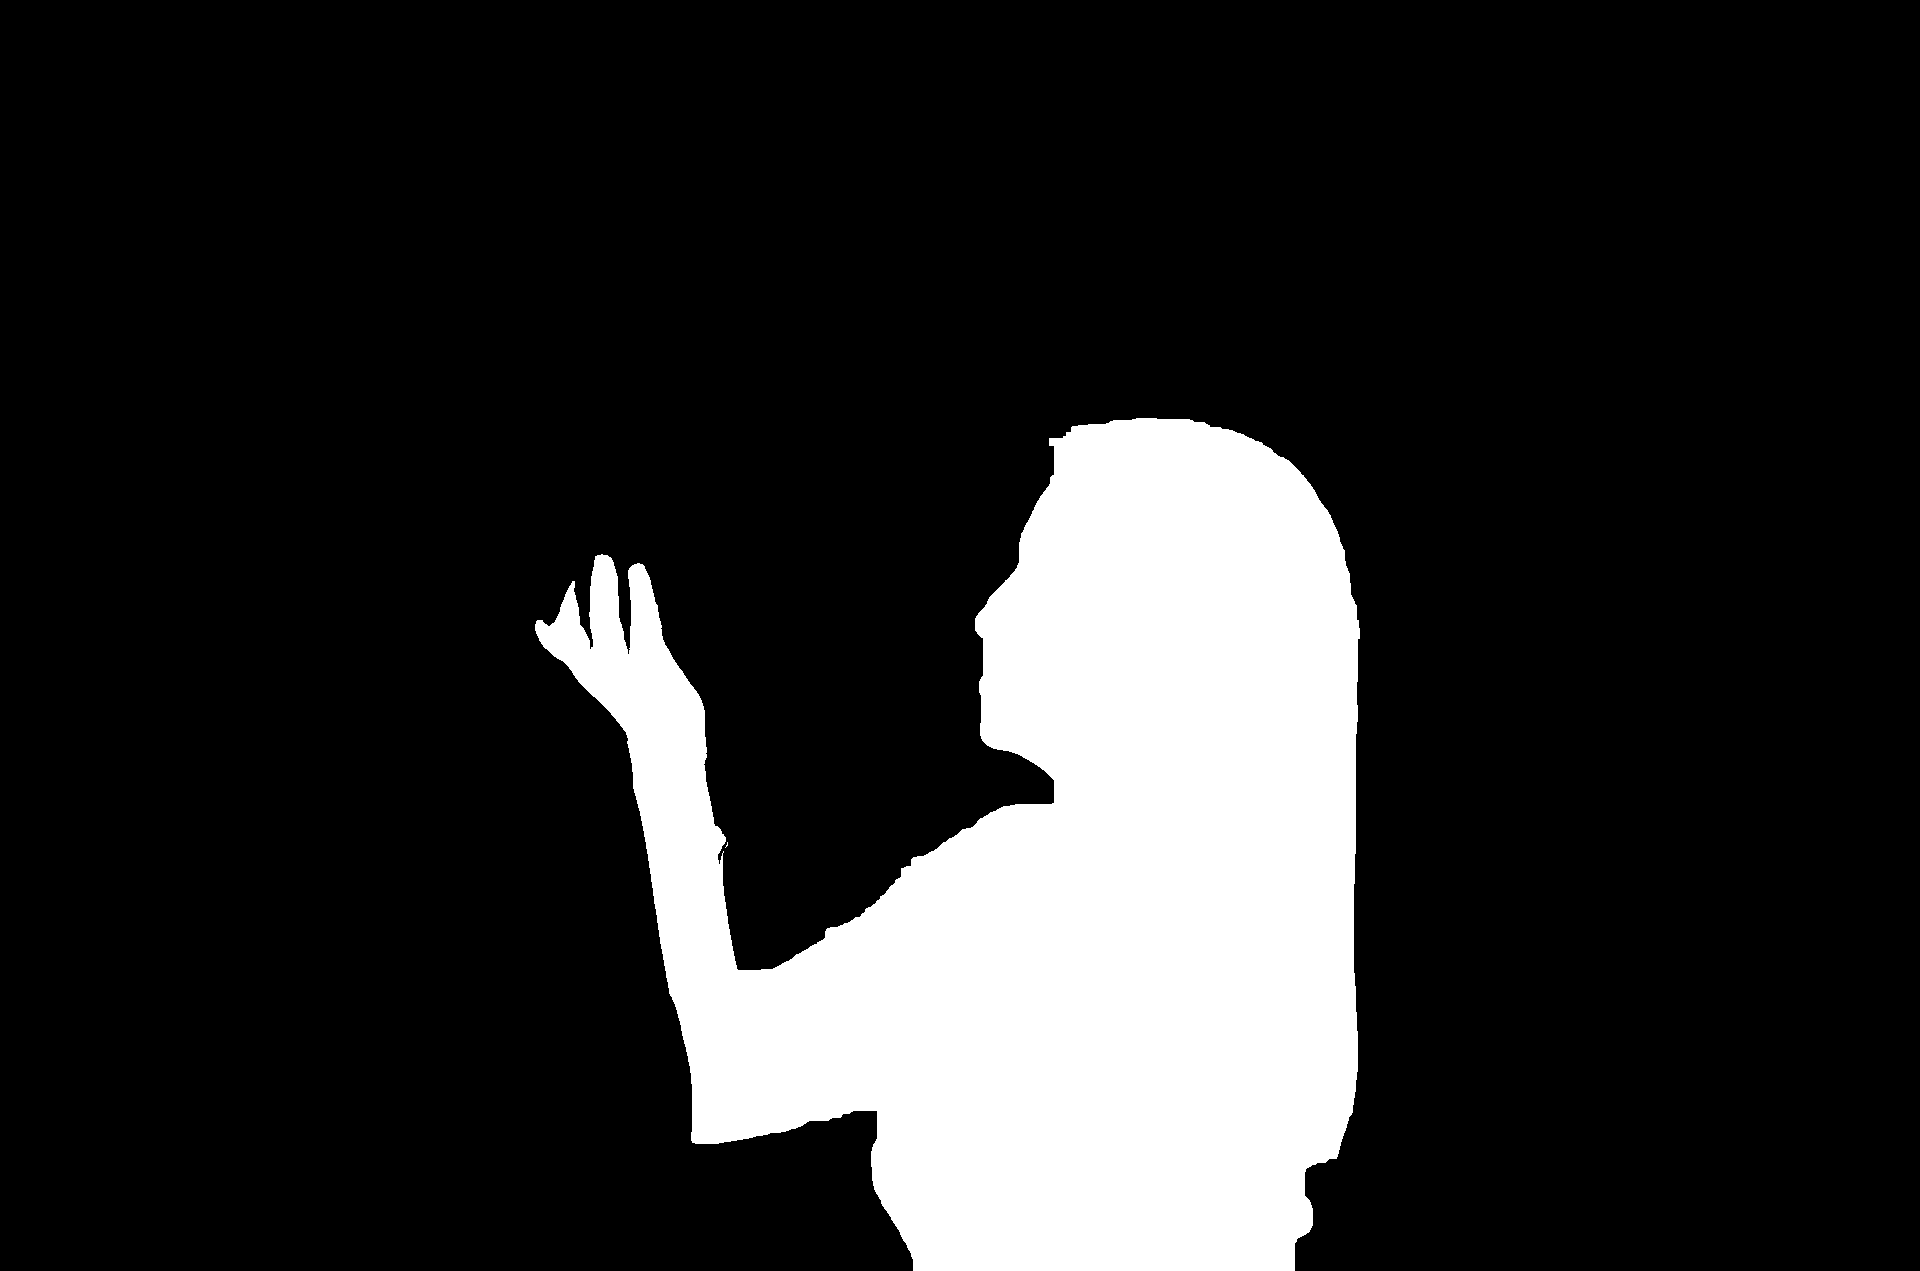

In [50]:
from PIL import Image
Image.fromarray((new_masks[0] * 255).astype('uint8'))

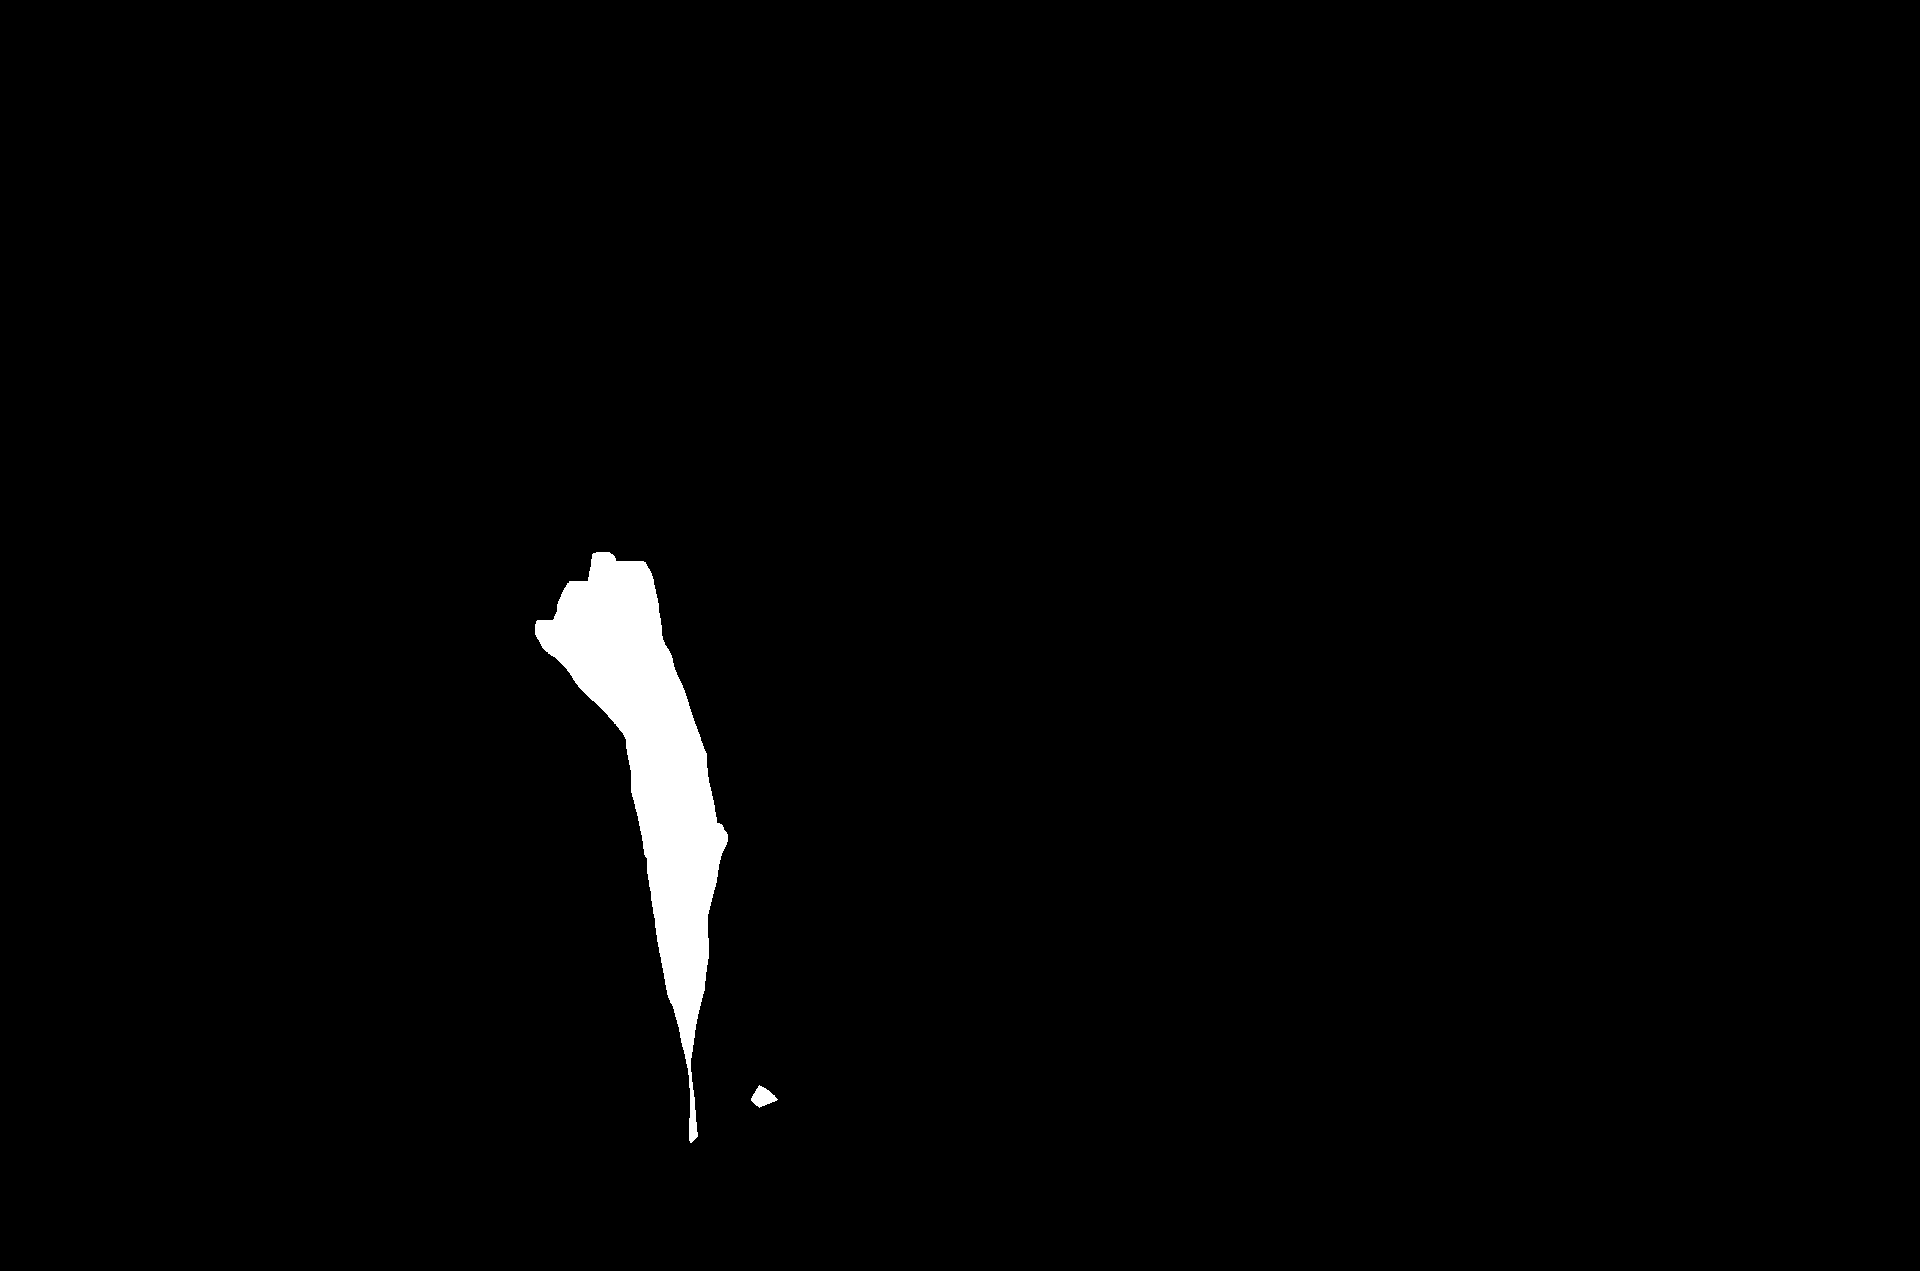

In [49]:
Image.fromarray((intersection * 255).astype('uint8'))